In [ ]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import file_organizer as fo

from func import fit_t2
from func import ticks_handle
from scipy.signal import find_peaks

## Water: FID

In [ ]:
path = 'data_day_three'
file_list = fo.load_file_list(path)

In [ ]:
selection = (fo.select_files(file_list,'meas','N'))
# load data to pd.dataFrame
data1 = fo.load_files(selection)
data1 = fo.df_combine(data1)
data1["time"] = data1["time"] * 1000

# data.info()
del(data1['iout'])

names1 = list(data1.columns)
names1.remove('time')

In [ ]:
from lmfit import Model
import numpy as np
 
def fit_t2s(t, y, log=False):
    def t2func(t, M0, T2,c):#
        return M0*np.exp(-t/T2)+c

    model = Model(t2func, nan_policy='omit')
    res = model.fit(y, t=t, M0=1, T2=20,c=0)
    if log: print(res.fit_report())
    return res

In [ ]:
zero = data1[names1[0]].abs().idxmax()
end = (data1['time']-18).abs().idxmin()
res = fit_t2s(np.array(data1.loc[zero:end, 'time']), np.array(data1.loc[zero:end, names1[0]]), log=False)

[[Model]]
    Model(t2func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 40
    # data points      = 8924
    # variables        = 3
    chi-square         = 120.453764
    reduced chi-square = 0.01350227
    Akaike info crit   = -38413.9045
    Bayesian info crit = -38392.6150
[[Variables]]
    M0:  2.97466920 +/- 0.00924905 (0.31%) (init = 1)
    T2:  0.88955229 +/- 0.00413779 (0.47%) (init = 20)
    c:   0.42702882 +/- 0.00158576 (0.37%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(M0, T2) = -0.689
    C(T2, c)  = -0.499


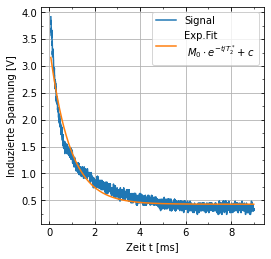

In [ ]:
fig,ax = plt.subplots(figsize=(4,4))
ax.plot(data1.loc[zero:,'time'], data1.loc[zero:, names1[0]], label='Signal')
ax.plot(data1.loc[zero:end,'time'], res.best_fit, label='Exp.Fit\n $M_0\\cdot e^{{-t/T_2^*}}+c$')

ax.set_xlabel('Zeit t [ms]')
ax.set_ylabel('Induzierte Spannung [V]')
ticks_handle(ax, which='both')
ax.grid()
ax.legend()
fig.savefig('IMAGES/diw_fid.png', dpi=300,bbox_inches='tight')

print(res.fit_report())

## Destilliertes Wasser: T2 Zeit

In [ ]:
selection2 = (fo.select_files(file_list,'meas','M'))

# load data to pd.dataFrame
data2 = fo.load_files(selection2)
data2 = fo.df_combine(data2)
data2["time"] = data2["time"] * 1000

# data.info()
del(data2['iout'])

names2 = list(data2.columns)
names2.remove('time')

In [ ]:
peaks = {n: find_peaks(data2[n], distance=400, height=0.6)[0][2:] for n in names2}
ptimes = {n: data2.loc[peaks[n], 'time'] for n in names2}
pvalues = {n: data2.loc[peaks[n], n] for n in names2}
results = {n: fit_t2(ptimes[n], pvalues[n]) for n in names2}

signal_171 T2= 999.6126438868135


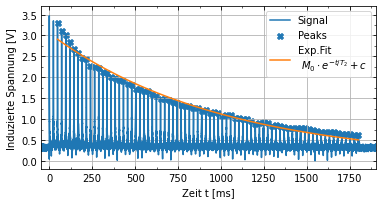

In [ ]:
fig,ax=plt.subplots(figsize=(6,3))
sel = [names2[0]]#, names2[2], names2[3], names2[4]]
data2.plot(x='time', y=sel[0], ax=ax, label='Signal')
for n in sel:
    ax.scatter(ptimes[n], pvalues[n], marker='X', label='Peaks')
    ax.plot(ptimes[n], results[n].best_fit, label='Exp.Fit\n $M_0\\cdot e^{{-t/T_2}}+c$')
    ax.legend()
    print(n, 'T2=',results[n].values['T2'])
ax.set_xlabel('Zeit t [ms]')
ax.set_xlim(-50, 1900)
ax.set_ylim(-0.2,3.7)
ax.set_ylabel('Induzierte Spannung [V]')
ticks_handle(ax, which='both')
ax.grid()
ax.legend()
fig.savefig('IMAGES/diw_exam.png', dpi=300,bbox_inches='tight')


signal_171 T2= 999.6126438868135
signal_173 T2= 1015.3724019430908
signal_174 T2= 1022.0529428283252
signal_175 T2= 1010.3758210858988


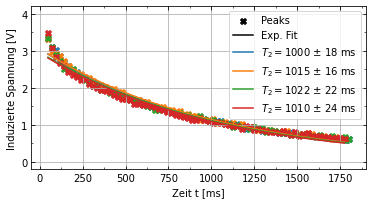

In [ ]:
sel = [names2[0], names2[2], names2[3], names2[4]]
fig,ax=plt.subplots(figsize=(6,3))

ax.scatter([],[], marker='X', color='black', label='Peaks')
ax.plot([],[], color='black', label='Exp. Fit')
for n in sel:
    t2string = f'{results[n].params["T2"].value:4.0f} $\\pm$ {results[n].params["T2"].stderr:2.0f} ms'

    ax.scatter(ptimes[n], pvalues[n], marker='X')
    ax.plot(ptimes[n], results[n].best_fit, label=f'$T_2=${t2string}')
    print(n, 'T2=',results[n].values['T2'])

ax.set_xlabel('Zeit t [ms]')
ax.set_ylim(-0.2,4.2)
ax.set_xlim(-50, 1900)
ax.set_ylabel('Induzierte Spannung [V]')
ticks_handle(ax, which='both')
ax.grid()
ax.legend()
fig.savefig('IMAGES/diw_result.png', dpi=300,bbox_inches='tight')
plt.show()


In [ ]:
for n in sel:
    print(n)
    print(results[n].params['T2'])
    print(results[n].params['M0'])
    print(results[n].redchi)
    print()

np.mean([results[n].params['T2'].value for n in sel])

signal_171
<Parameter 'T2', value=999.6126438868135 +/- 18.3, bounds=[-inf:inf]>
<Parameter 'M0', value=3.0525221940619636 +/- 0.0349, bounds=[-inf:inf]>
0.009094769982420751

signal_173
<Parameter 'T2', value=1015.3724019430908 +/- 16.5, bounds=[-inf:inf]>
<Parameter 'M0', value=3.0544305526201736 +/- 0.0305, bounds=[-inf:inf]>
0.007009375411519954

signal_174
<Parameter 'T2', value=1022.0529428283252 +/- 21.8, bounds=[-inf:inf]>
<Parameter 'M0', value=2.961619340781165 +/- 0.039, bounds=[-inf:inf]>
0.01155685061901801

signal_175
<Parameter 'T2', value=1010.3758210858988 +/- 24.4, bounds=[-inf:inf]>
<Parameter 'M0', value=2.940819896395996 +/- 0.0438, bounds=[-inf:inf]>
0.014397901541647782



1011.8534524360321

In [ ]:
24.4/2

12.2

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c333ff75-d5d2-432c-b928-cf45631da0c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>